## In this project I'll use information from Polish Statistic Office about polish population for years 2001-2021 to see what is amount of people in particular year and particular age or population density in accordance with region.

### 1. In first step I'll import all bibliotecs what I'll need in this project.

#### The os bibliotec is necessary to work with data which are stored on my computer, to search for them and load.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 2. In this step I'll search for directory in which I store in data for this project.

#### In my case .csv files which contains data for this project are in `'Jupyter/Project_2/Data'`.

In [2]:
cwd = os.getcwd()

fld = os.listdir(cwd)

print(f'{cwd}\n')
print(f'{fld}\n')

/Users/Piotrek/Jupyter/Project_2/Data

['LICENSE', 'README.md', '.gitignore', 'TABLE_00.csv', 'TABLE_01.csv', 'TABLE_02.csv', '.ipynb_checkpoints', '.git', 'Polish Population.ipynb']



### 3. I'll work with .csv files, one by one, to get interesting me data:

> #### 3.1. Question 1: How many people was in Poland in particular age in 2021?
> #### 3.2. Question 2: What was population density in particular polish regions in 2021?
> #### 3.3. Question 3: What was dependency ratio in Poland in 2021?

### 4. Data accomplishment process for first question:

> #### 4.1. I'll start with first data frame to answer first question from previous point.
>>- #### Creating list of `.csv` files.
>>- #### Creating `dataframes` from `.csv` files list.
>>- #### Getting info about `dataframe` to check what `type` of data, columns and records i have to work with.

In [3]:
files = ['TABLE_0' + str(num) + '.csv' for num in range(3)]

df_1 = pd.read_csv(files[0], sep = ';')
df_2 = pd.read_csv(files[1], sep = ';')
df_3 = pd.read_csv(files[2], sep = ';')

df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Zmienna                     6363 non-null   object
 1   Typ informacji              6363 non-null   object
 2   Jednostka terytorialna      6363 non-null   object
 3   Płeć                        6363 non-null   object
 4   Wiek - pojedyncze roczniki  6363 non-null   object
 5   Szereg czasowy              6363 non-null   int64 
 6   Wartość                     6363 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 348.1+ KB


,Zmienna,Typ informacji,Jednostka terytorialna,Płeć,Wiek - pojedyncze roczniki,Szereg czasowy,Wartość
0,Ludność,[osoba],POLSKA,Mężczyźni,96 lat,2001,799
1,Ludność,[osoba],POLSKA,Kobiety,86 lat,2001,35227
2,Ludność,[osoba],POLSKA,Ogółem,51 lat,2001,572411
3,Ludność,[osoba],POLSKA,Ogółem,46 lat,2001,640050
4,Ludność,[osoba],POLSKA,Kobiety,20 lat,2001,312334


> #### 4.2. Below steps are part from cleaning process to increase clarity of dataframe.
>>- #### Creating new dataframe `cleaned_df_1` for cleaning purpose.
>>- #### Spliting column and creating new `'AGE'` column with first element from old.
>>- #### Dropping columns using var list of columns that I will not use.
>>- #### Renameing remain columns for better clarity.
>>- #### And changing positions of columns.

In [4]:
cleaned_df_1 = df_1
cleaned_df_1['AGE'] = df_1['Wiek - pojedyncze roczniki'].str.split(pat = ' ').str[0]

col_drop_1 = ['Zmienna', 'Typ informacji', 'Wiek - pojedyncze roczniki']
cleaned_df_1 = cleaned_df_1.drop(columns = col_drop_1)

col_rename_1 = {'Jednostka terytorialna': 'TERRITORY', 'Szereg czasowy': 'YEAR', 'Wartość': 'POPULATION', 'Płeć': 'GENDER'}
cleaned_df_1 = cleaned_df_1.rename(columns = col_rename_1)

col_reindex_1 = ['YEAR', 'TERRITORY', 'GENDER', 'AGE', 'POPULATION']
cleaned_df_1 = cleaned_df_1.reindex(columns = col_reindex_1)

cleaned_df_1.info()
cleaned_df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        6363 non-null   int64 
 1   TERRITORY   6363 non-null   object
 2   GENDER      6363 non-null   object
 3   AGE         6363 non-null   object
 4   POPULATION  6363 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 248.7+ KB


,YEAR,TERRITORY,GENDER,AGE,POPULATION
0,2001,POLSKA,Mężczyźni,96,799
1,2001,POLSKA,Kobiety,86,35227
2,2001,POLSKA,Ogółem,51,572411
3,2001,POLSKA,Ogółem,46,640050
4,2001,POLSKA,Kobiety,20,312334


> #### 4.3. Below steps are part from cleaning process to replace specific values and types of dataframe `cleaned_df_1` for clarity and computation.
>>- #### Replacing values in `'TERRITORY'` column.
>>- #### Replacing values in `'GENDER'` column.
>>- #### Replacing values in `'AGE'` column.
>>- #### Changing data type in `'AGE'` column for `int64`.

In [5]:
for row in cleaned_df_1['TERRITORY']:
    if row == 'POLSKA':
        cleaned_df_1['TERRITORY'] = cleaned_df_1['TERRITORY'].replace(['POLSKA'], ['Poland'])

for row in cleaned_df_1['GENDER']:
    if row == 'Kobiety':
        cleaned_df_1['GENDER'] = cleaned_df_1['GENDER'].replace(['Kobiety'], ['Females'])
    elif row == 'Mężczyźni':
        cleaned_df_1['GENDER'] = cleaned_df_1['GENDER'].replace(['Mężczyźni'], ['Males'])
    else:
        cleaned_df_1['GENDER'] = cleaned_df_1['GENDER'].replace(['Ogółem'], ['Total'])
        
for row in cleaned_df_1['AGE']:
    if row == '0lat':
        cleaned_df_1['AGE'] = cleaned_df_1['AGE'].replace(['0lat'], ['0'])
        
cleaned_df_1['AGE'] = cleaned_df_1['AGE'].astype('int64')

cleaned_df_1.info()
cleaned_df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6363 entries, 0 to 6362
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        6363 non-null   int64 
 1   TERRITORY   6363 non-null   object
 2   GENDER      6363 non-null   object
 3   AGE         6363 non-null   int64 
 4   POPULATION  6363 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 248.7+ KB


,YEAR,TERRITORY,GENDER,AGE,POPULATION
0,2001,Poland,Males,96,799
1,2001,Poland,Females,86,35227
2,2001,Poland,Total,51,572411
3,2001,Poland,Total,46,640050
4,2001,Poland,Females,20,312334


> #### 4.4. In steps below I'll use filter to extract data what contain information about population in 2021.
>>- #### Using `mask_1` boolean mask on `'AGE'` column.
>>- #### Creating new filtered dataframe `filtered_df_1`.

In [6]:
mask_1 = cleaned_df_1['YEAR'] == 2021
filtered_df_1 = cleaned_df_1[mask_1]

filtered_df_1.head()

,YEAR,TERRITORY,GENDER,AGE,POPULATION
6060,2021,Poland,Females,80,115121
6061,2021,Poland,Total,46,579919
6062,2021,Poland,Total,99,3743
6063,2021,Poland,Females,15,183372
6064,2021,Poland,Females,1,170235


>>- #### In steps below I'll creat dataframe `pivot_df_1` what shows values of population by gender in order of age to make comparation.
>>- #### And create plot for better visualization with new rounded dataframe `round_df_1`.

In [7]:
pivot_df_1 = pd.pivot_table(
    filtered_df_1,
    values = 'POPULATION',
    index = ['YEAR', 'TERRITORY', 'AGE'],
    columns = 'GENDER',
    aggfunc = 'max')

pivot_df_1.head()

GENDER              Females   Males   Total
YEAR TERRITORY AGE                         
2021 Poland    0     160107  168702  328809
               1     170235  179346  349581
               2     182304  192516  374820
               3     190719  202258  392977
               4     200269  211228  411497

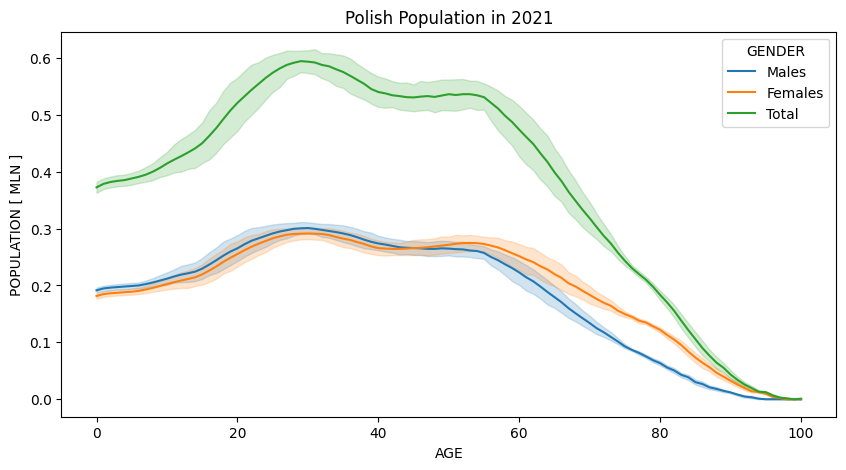

In [8]:
round_df_1 = cleaned_df_1

round_df_1['POPULATION'] = round(round_df_1['POPULATION'] / 1000000, 2)
col_rename = {'POPULATION': 'POPULATION [ MLN ]'}
round_df_1 = round_df_1.rename(columns = col_rename)

plt.figure(figsize = (10, 5))

plot_1 = sns.lineplot(data = round_df_1, x = 'AGE', y = 'POPULATION [ MLN ]', hue = 'GENDER')

plot_1.set_title('Polish Population in 2021')

plt.show(plot_1)

### 5. Data accomplishment process for second question:

> #### 5.1. I'll take second dataframe to answer second question from point 3.
>>- #### Using experience from work with first dataframe, cleaing and modifing process will be shorter.
>>- #### In this dataframe I decided to leave original names of territories.
>>- #### Table `'POPULATION DENSITY [ P / SQUARE KM ]'` means `person` per `square km`.

In [9]:
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Zmienna                 16 non-null     object
 1   Typ informacji          16 non-null     object
 2   Jednostka terytorialna  16 non-null     object
 3   Szereg czasowy          16 non-null     int64 
 4   Wartość                 16 non-null     object
dtypes: int64(1), object(4)
memory usage: 768.0+ bytes


,Zmienna,Typ informacji,Jednostka terytorialna,Szereg czasowy,Wartość
0,Gęstość zaludnienia,[osoba/km2],WIELKOPOLSKIE,2021,"117,0"
1,Gęstość zaludnienia,[osoba/km2],WARMIŃSKO-MAZURSKIE,2021,"57,0"
2,Gęstość zaludnienia,[osoba/km2],MAZOWIECKIE,2021,"155,0"
3,Gęstość zaludnienia,[osoba/km2],ŚLĄSKIE,2021,"355,0"
4,Gęstość zaludnienia,[osoba/km2],KUJAWSKO-POMORSKIE,2021,"112,0"


In [10]:
cleaned_df_2 = df_2
cleaned_df_2['POPULATION DENSITY [ P / SQUARE KM ]'] = df_2['Wartość'].str.split(pat = ',').str[0]

col_rename_2 = {'Jednostka terytorialna': 'POLAND TERRITORY', 'Szereg czasowy': 'YEAR'}
cleaned_df_2 = cleaned_df_2.rename(columns = col_rename_2)

col_drop_2 = ['Zmienna', 'Typ informacji', 'Wartość']
cleaned_df_2 = cleaned_df_2.drop(columns = col_drop_2)

col_reindex_2 = ['YEAR', 'POLAND TERRITORY', 'POPULATION DENSITY [ P / SQUARE KM ]']
cleaned_df_2 = cleaned_df_2.reindex(columns = col_reindex_2)

cleaned_df_2['POPULATION DENSITY [ P / SQUARE KM ]'] = cleaned_df_2['POPULATION DENSITY [ P / SQUARE KM ]'].astype('int64')

for row in cleaned_df_2['POLAND TERRITORY']:
    cleaned_df_2['POLAND TERRITORY'] = cleaned_df_2['POLAND TERRITORY'].str.title()

cleaned_df_2.info()
cleaned_df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   YEAR                                  16 non-null     int64 
 1   POLAND TERRITORY                      16 non-null     object
 2   POPULATION DENSITY [ P / SQUARE KM ]  16 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


,YEAR,POLAND TERRITORY,POPULATION DENSITY [ P / SQUARE KM ]
0,2021,Wielkopolskie,117
1,2021,Warmińsko-Mazurskie,57
2,2021,Mazowieckie,155
3,2021,Śląskie,355
4,2021,Kujawsko-Pomorskie,112


>>- #### Creating new dataframe `agg_df_2` for aggregation purpose.
>>- #### Also dataframe agg_df_2 will be `sorted` to see what territories were the most occupied in 2021.
>>- #### Creating plot for better visualization.

In [11]:
agg_df_2 = cleaned_df_2.groupby(['YEAR', 'POLAND TERRITORY']).agg({'POPULATION DENSITY [ P / SQUARE KM ]': 'max'})
agg_df_2 = agg_df_2.sort_values(by = 'POPULATION DENSITY [ P / SQUARE KM ]', ascending = False)

agg_df_2.head()

POPULATION DENSITY [ P / SQUARE KM ]
YEAR POLAND TERRITORY                                      
2021 Śląskie                                            355
     Małopolskie                                        226
     Mazowieckie                                        155
     Dolnośląskie                                       145
     Łódzkie                                            131

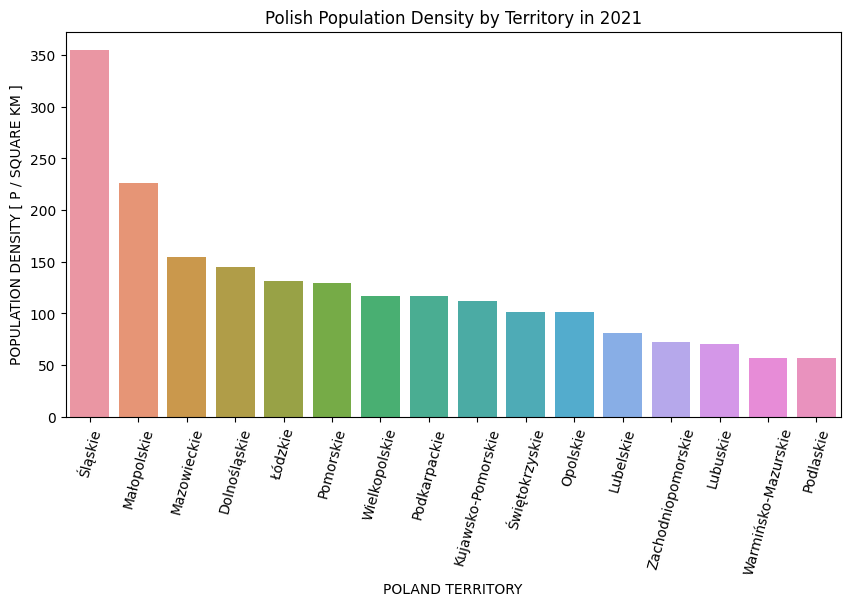

In [12]:
sorted_df_2 = cleaned_df_2.sort_values(by = 'POPULATION DENSITY [ P / SQUARE KM ]', ascending = False)

plt.figure(figsize=(10, 5))

plot_2 = sns.barplot(data = sorted_df_2, x = 'POLAND TERRITORY', y = 'POPULATION DENSITY [ P / SQUARE KM ]')

plot_2.tick_params(axis='x', rotation=75)

plot_2.set_title('Polish Population Density by Territory in 2021')

plt.show(plot_2)

### 6. Data accomplishment process for third question:

> #### 6.1. Finally I'll work with third data frame to answer last question from point 3.
>>- #### Using experience from work with first and second dataframes, cleaing and modifing process will be shorter as well to create aggregate dataframe `agg_df_3` and plot.

In [13]:
df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Zmienna                 18 non-null     object
 1   Typ informacji          18 non-null     object
 2   Jednostka terytorialna  18 non-null     object
 3   Szereg czasowy          18 non-null     int64 
 4   Wartość                 18 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 848.0+ bytes


,Zmienna,Typ informacji,Jednostka terytorialna,Szereg czasowy,Wartość
0,Współczynnik obciążenia demograficznego – całk...,[osoba],POLSKA,2000,64
1,Współczynnik obciążenia demograficznego ludnoś...,[osoba],POLSKA,2000,24
2,Współczynnik obciążenia demograficznego ludnoś...,[osoba],POLSKA,2000,40
3,Współczynnik obciążenia demograficznego – całk...,[osoba],POLSKA,2005,56
4,Współczynnik obciążenia demograficznego ludnoś...,[osoba],POLSKA,2005,24


In [14]:
cleaned_df_3 = df_3

for value in cleaned_df_3['Zmienna']:
    if value == 'Współczynnik obciążenia demograficznego – całkowity':
        cleaned_df_3['Zmienna'] = cleaned_df_3['Zmienna'].replace(['Współczynnik obciążenia demograficznego – całkowity'], ['Total'])
    elif value == 'Współczynnik obciążenia demograficznego ludnością w wieku poprodukcyjnym':
        cleaned_df_3['Zmienna'] = cleaned_df_3['Zmienna'].replace(['Współczynnik obciążenia demograficznego ludnością w wieku poprodukcyjnym'], ['Post-production age'])
    else:
        cleaned_df_3['Zmienna'] = cleaned_df_3['Zmienna'].replace(['Współczynnik obciążenia demograficznego ludnością w wieku przedprodukcyjnym'], ['Pre-production age'])

In [15]:
col_drop_3 = ['Typ informacji']
cleaned_df_3 = cleaned_df_3.drop(columns = col_drop_3)

col_rename_3 = {'Zmienna': 'DEMOGRAPHIC DEPENDENCY RATIO', 'Jednostka terytorialna': 'TERRITORY', 'Szereg czasowy': 'YEAR', 'Wartość': 'VALUE'}
cleaned_df_3 = cleaned_df_3.rename(columns = col_rename_3)

col_reindex_3 = ['YEAR', 'TERRITORY', 'DEMOGRAPHIC DEPENDENCY RATIO', 'VALUE']
cleaned_df_3 = cleaned_df_3.reindex(columns = col_reindex_3)

In [16]:
for row in cleaned_df_3['TERRITORY']:
    if row == 'POLSKA':
        cleaned_df_3['TERRITORY'] = cleaned_df_3['TERRITORY'].replace(['POLSKA'], ['Poland'])

In [17]:
mask_2 = cleaned_df_3['YEAR'] == 2021
filtered_df_3 = cleaned_df_3[mask_2]

In [18]:
agg_df_3 = filtered_df_3.groupby(['YEAR', 'TERRITORY', 'DEMOGRAPHIC DEPENDENCY RATIO']).agg({'VALUE': 'max'})
agg_df_3 = agg_df_3.sort_values(by = 'VALUE', ascending = False)

agg_df_3.info()
agg_df_3.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3 entries, (2021, 'Poland', 'Total') to (2021, 'Poland', 'Pre-production age')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VALUE   3 non-null      int64
dtypes: int64(1)
memory usage: 261.0+ bytes


VALUE
YEAR TERRITORY DEMOGRAPHIC DEPENDENCY RATIO       
2021 Poland    Total                            69
               Post-production age              38
               Pre-production age               31

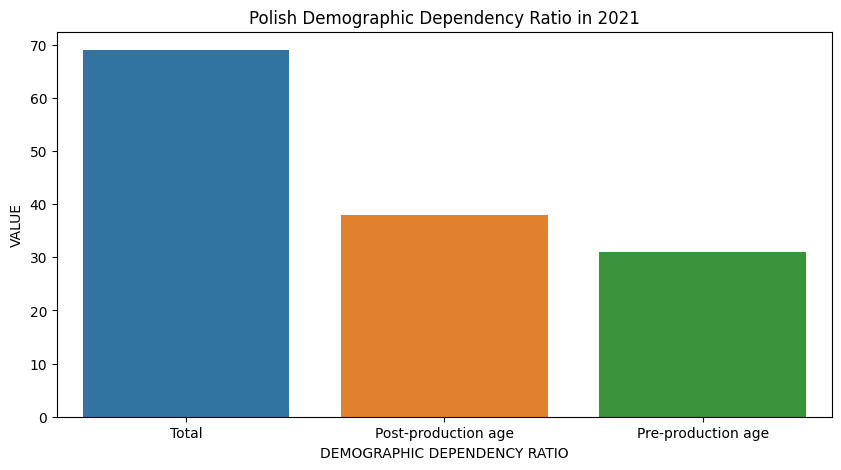

In [21]:
plt.figure(figsize=(10, 5))

plot_3 = sns.barplot(data = filtered_df_3, x = 'DEMOGRAPHIC DEPENDENCY RATIO', y = 'VALUE')

plot_3.tick_params(axis='x', rotation=0)

plot_3.set_title('Polish Demographic Dependency Ratio in 2021')

plt.show(plot_3)

### 7. Summary:

> #### 7.1. Dataframe what answer for first question: `pivot_df_1` and plot `plot_1`.
> #### 7.2. Dataframe what answer for second question: `agg_df_2` and plot `plot_2`.
> #### 7.3. Dataframe what answer for third question: `agg_df_3` and plot `plot_3`.

In [22]:
pivot_df_1.head()

GENDER              Females   Males   Total
YEAR TERRITORY AGE                         
2021 Poland    0     160107  168702  328809
               1     170235  179346  349581
               2     182304  192516  374820
               3     190719  202258  392977
               4     200269  211228  411497

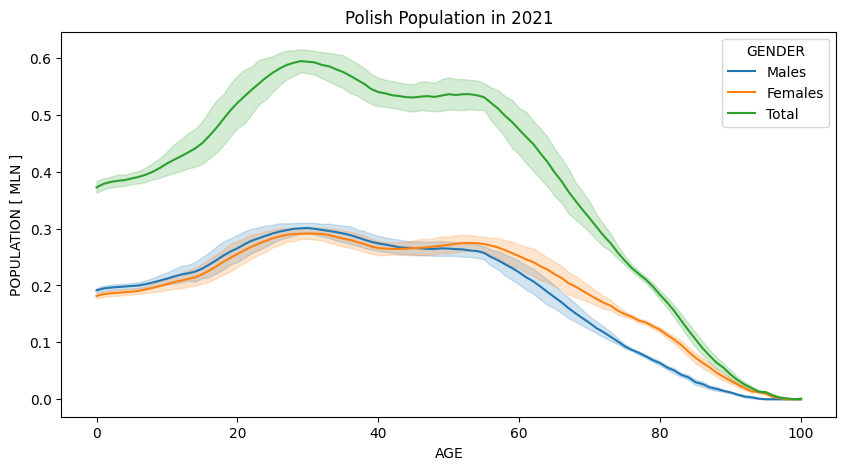

In [23]:
plt.figure(figsize = (10, 5))
plot_1 = sns.lineplot(data = round_df_1, x = 'AGE', y = 'POPULATION [ MLN ]', hue = 'GENDER')
plot_1.set_title('Polish Population in 2021')
plt.show(plot_1)

In [24]:
agg_df_2.head()

POPULATION DENSITY [ P / SQUARE KM ]
YEAR POLAND TERRITORY                                      
2021 Śląskie                                            355
     Małopolskie                                        226
     Mazowieckie                                        155
     Dolnośląskie                                       145
     Łódzkie                                            131

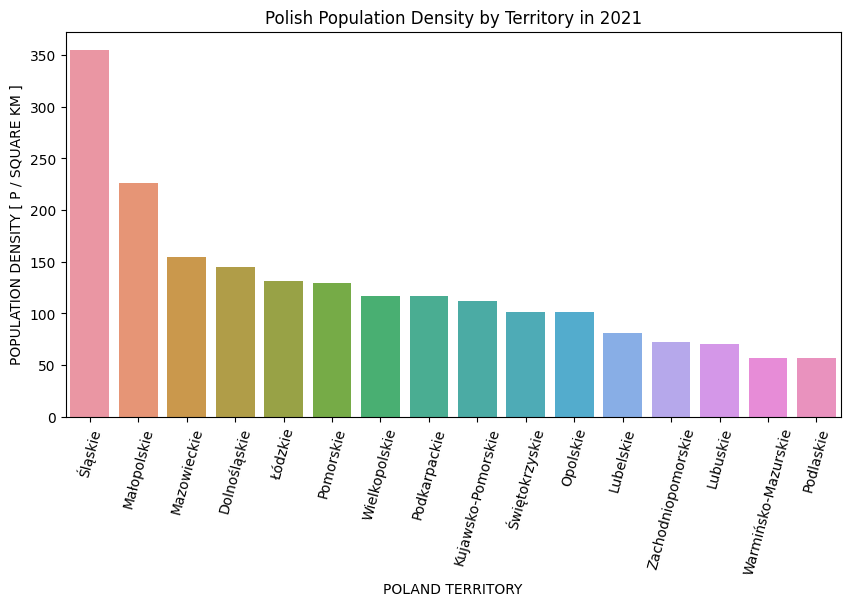

In [25]:
plt.figure(figsize=(10, 5))
plot_2 = sns.barplot(data = sorted_df_2, x = 'POLAND TERRITORY', y = 'POPULATION DENSITY [ P / SQUARE KM ]')
plot_2.tick_params(axis='x', rotation=75)
plot_2.set_title('Polish Population Density by Territory in 2021')
plt.show(plot_2)

In [26]:
agg_df_3.head()

VALUE
YEAR TERRITORY DEMOGRAPHIC DEPENDENCY RATIO       
2021 Poland    Total                            69
               Post-production age              38
               Pre-production age               31

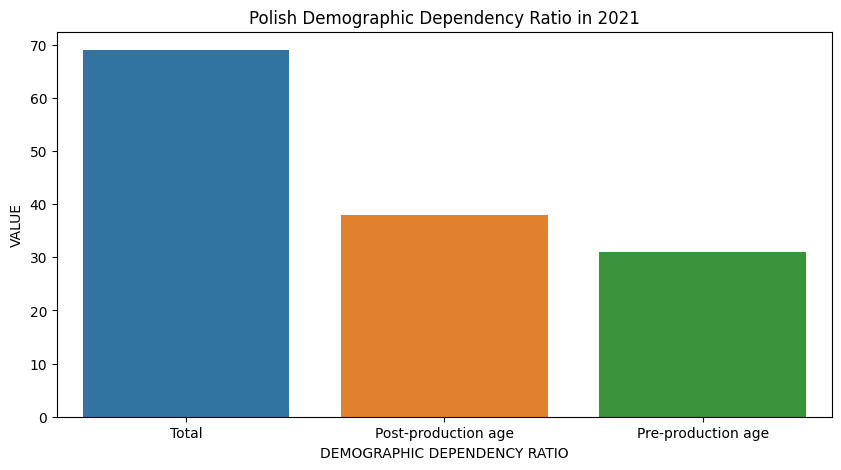

In [29]:
plt.figure(figsize = (10, 5))
plot_3 = sns.barplot(data = filtered_df_3, x = 'DEMOGRAPHIC DEPENDENCY RATIO', y = 'VALUE')
plot_3.tick_params(axis='x', rotation=0)
plot_3.set_title('Polish Demographic Dependency Ratio in 2021')
plt.show(plot_3)